In [1]:
import kan
import kan.utils as ku
import torch
import torch.nn as nn
import numpy as np
from libraries import utils
from libraries import magnetization
from libraries import j1j2_functions
import numpy.random as npr
import qutip as qt
import sympy
import random

In [2]:
N=10
input = utils.generate_input_torch(N)
labels = torch.tensor([-1 + 2 * (magnetization.count_half_magnetization(i) % 2) for i in range(2 ** N)]).reshape((-1, 1))

In [3]:
dataset = {'train_input': input, 'train_label': labels, 'test_input': input, 'test_label': labels}
kan_model = kan.KAN(width = [N, N, N, N, 1, 1])
kan_model(dataset['train_input']);

checkpoint directory created: ./model
saving model version 0.0


In [4]:
tanh = lambda x : torch.tanh(x)
kan_model.fix_symbolic(4, 0, 0, tanh)
kan_model.symbolic_fun[4].affine = nn.Parameter(torch.tensor([[[1, 0, 1, 0]]], dtype = torch.float64), requires_grad=False)
for i in range(N):
    for j in range(N):
        kan_model.fix_symbolic(0, j, i, 'x', verbose=False, log_history=False)

saving model version 0.1


In [5]:
kan_model.fit(dataset, steps=20, lamb=1e-5);

| train_loss: 3.42e-03 | test_loss: 3.42e-03 | reg: 3.97e+01 | : 100%|█| 20/20 [00:55<00:00,  2.78s/

saving model version 0.2


saving model version 0.3


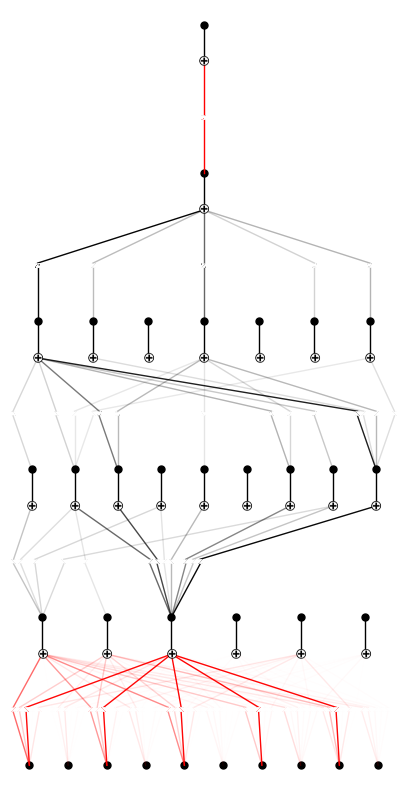

In [6]:
kan_model.prune().plot()

In [ ]:
kan_model = kan_model.prune()
kan_model.symbolic_fun[3].affine = nn.Parameter(kan_model.symbolic_fun[3].affine.data, requires_grad=False)

saving model version 0.3
